<a href="https://colab.research.google.com/github/Djuikem/Master_Thesis_AIMS/blob/main/final_textual_to_tabular_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gensim numpy==2 scipy==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gensim to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3


In [ ]:
!pip install scipy==1.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.12.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,  roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec # ⚒️

import spacy


# 📌 Install necessary libraries
# !pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras cvxopt psutil

# 📌 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil  # For CPU and memory usage

# 📌 Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# 📌 Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras cvxopt psutil qpsolvers

# 📌 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from qpsolvers import solve_qp  # Quadratic programming for Twin SVM
import numpy as np
from numpy.linalg import inv, norm
from sklearn.utils import check_X_y, check_array

# 📌 Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold


import cvxopt  # For LSSVM optimization

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the punkt_tab data package
nltk.download('punkt_tab')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Combined Data.csv', engine='python')
df, _ = train_test_split(df, test_size=0.9, random_state=42, stratify=df['status'])

# Load data
df = df.dropna(subset=['statement'])  # Drop rows with missing statements

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [ ]:
sentences = []
targets = []

'''
for index in df.index:  # Iterate over the actual index values
  sentence = df.loc[index, 'statement']

  sentence = re.sub(r'[^\w\s]', '', sentence)
  temp = []
  words = word_tokenize(sentence)
  if len(words) > 3 and len(words) < 200:
    for j in word_tokenize(sentence):
        temp.append(j.lower())
    sentences.append(temp)
    targets.append(df.loc[index, 'status'])

print(sentences)
print(targets)'''

for index in df.index:  # Iterate over the actual index values
  sentence = df.loc[index, 'statement']

  sentence = re.sub(r'[^\w\s]', '', sentence)
  temp = []
  words = [lemmatizer.lemmatize(word) for word in word_tokenize(sentence) if not word in stop_words]
  if len(words) > 3 and len(words) < 200:
    for j in words:
        temp.append(j.lower())
    sentences.append(temp)
    targets.append(df.loc[index, 'status'])

print(sentences)
print(targets)

[['lay', 'sleep', 'head', 'keep', 'running', 'thought', 'either', 'give', 'guilt', 'anxiety', 'stop', 'reach', 'state', 'smack', 'head', 'head', 'cause', 'pain', 'give', 'relax', 'sometime', 'brain', 'focus', 'pain', 'caused', 'smacking', 'instead', 'running', 'stupid', 'thought'], ['tired', 'coming', 'second', 'finding', 'partner', 'chosen', 'someone', 'say', 'someone', 'everyone', 'think', 'say', 'go', 'looking', 'someone', 'come', 'find', 'think', 'say', 'fall', 'lap', 'least', 'expect', 'think', 'situation', 'happened', 'always', 'fail', 'tired', 'enough'], ['solace', 'trees', 'trees', 'captured', 'buring', 'various', 'season', 'create', 'tranquil', 'scenario', 'the', 'melodic', 'sound', 'create', 'atmosphere', 'perfect', 'meditation', 'deep', 'sleep', 'studying', 'stress', 'management', 'anxiety', 'relief', 'httpsyoutubec6m4rvtcvsahttpsyoutubec6m4rvtcvsa'], ['no', 'sex', 'everyday', 'yes', 'work', 'problem', 'change', 'i', 'said', 'im', 'usually', 'successful', '1', '4', 'time', '

In [ ]:
unique_sent = set()
for sent in sentences:
  for word in sent:
    unique_sent.add(word)

In [ ]:
len(unique_sent)

15527

-------

In [ ]:
# Train Word2Vec model
model = Word2Vec(sentences = sentences, vector_size=60, window=5, min_count=1, workers=4)

In [ ]:
'''# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    return np.array([model.wv[word] for word in sentence if word in model.wv])

# Transform your text data into vectors
#X = np.array([sentence_to_vector(text) for text in df['statement']])
X = [sentence_to_vector(text) for text in df['statement']]
'''

# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array, or an empty array if no words are found
    return np.array(vectors) if vectors else np.empty((0, model.vector_size))

# Find the maximum length of any sentence
max_length = max(len(sentence_to_vector(sentence)) for sentence in sentences)

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in sentences]


'''
# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array, or an empty array if no words are found
    return np.array(vectors) if vectors else np.empty((0, model.vector_size))

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in df['statement']]


# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array with zeros if no words are found, ensuring uniform shape
    if not vectors:
        return np.zeros((max_length, model.vector_size))  # Return zeros array with desired shape
    # Pad or truncate vectors to match max_length
    vec = np.array(vectors)
    if vec.shape[0] < max_length:
        vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant')
    elif vec.shape[0] > max_length:
        vec = vec[:max_length]
    return vec

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in df['statement']]

# Convert to a NumPy array
X_padded = np.array(X)
'''

'''# Function to convert sentences to vectors
def sentence_to_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return a NumPy array with zeros if no words are found, ensuring uniform shape
    if not vectors:
        return np.zeros((max_length, model.vector_size))  # Return zeros array with desired shape
    # Pad or truncate vectors to match max_length
    vec = np.array(vectors)
    if vec.shape[0] < max_length:
        vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant')
    elif vec.shape[0] > max_length:
        vec = vec[:max_length]
    return vec

# Find the maximum length of any sentence
max_length = max(len(sentence) for sentence in df['statement']) #  Get the maximum length of sentences

# Transform your text data into vectors
X = [sentence_to_vector(text) for text in df['statement']]

# Convert to a NumPy array
X_padded = np.array(X)'''

"# Function to convert sentences to vectors\ndef sentence_to_vector(sentence):\n    vectors = [model.wv[word] for word in sentence if word in model.wv]\n    # Return a NumPy array with zeros if no words are found, ensuring uniform shape\n    if not vectors:\n        return np.zeros((max_length, model.vector_size))  # Return zeros array with desired shape\n    # Pad or truncate vectors to match max_length\n    vec = np.array(vectors)\n    if vec.shape[0] < max_length:\n        vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant')\n    elif vec.shape[0] > max_length:\n        vec = vec[:max_length]\n    return vec\n\n# Find the maximum length of any sentence\nmax_length = max(len(sentence) for sentence in df['statement']) #  Get the maximum length of sentences\n\n# Transform your text data into vectors\nX = [sentence_to_vector(text) for text in df['statement']]\n\n# Convert to a NumPy array\nX_padded = np.array(X)"

In [ ]:
X[1].shape

(30, 60)

In [ ]:
# Padding or truncating sequences to ensure uniform length
#max_length = 5  # Define the maximum length of sequences
#X_padded = np.array([np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant') if vec.shape[0] < max_length else vec[:max_length] for vec in X])
'''
# Padding or truncating sequences to ensure uniform length
max_length = 200  # Define the maximum length of sequences
X_padded = []
for vec in X:
    if vec.size == 0:  # Check if the vector is empty
        padded_vec = np.zeros((max_length, 100))  # Create a zero-filled array
    else:
        padded_vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant') if vec.shape[0] < max_length else vec[:max_length]
    X_padded.append(padded_vec)
X_padded = np.array(X_padded)'''

# Padding or truncating sequences to ensure uniform length
X_padded = []
for vec in X:
    if vec.size == 0:  # Check if the vector is empty
        padded_vec = np.zeros((max_length, 100))  # Create a zero-filled array
    else:
        padded_vec = np.pad(vec, ((0, max_length - vec.shape[0]), (0, 0)), 'constant') if vec.shape[0] < max_length else vec[:max_length]
    X_padded.append(padded_vec)
X_padded = np.array(X_padded)

In [ ]:
X_padded.shape

(4459, 199, 60)

In [ ]:
# reshape
X_padded = X_padded.reshape(X_padded.shape[0], -1)

In [ ]:
targets = pd.Series(targets)

In [ ]:
targets.unique()

array(['Depression', 'Stress', 'Normal', 'Suicidal', 'Bipolar', 'Anxiety',
       'Personality disorder'], dtype=object)

In [ ]:
# Personnal Mapping

perso_mapping = {'Normal': 0, 'Bipolar': 1, 'Depression':2, 'Anxiety':3, 'Stress':4, 'Suicidal':5, 'Personality disorder':6}
y = targets.map(perso_mapping)
y

,0
0,2
1,2
2,4
3,0
4,2
...,...
4454,2
4455,5
4456,5
4457,0


In [ ]:
'''# 🔹 Split data 🔹
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)'''

'# 🔹 Split data 🔹\nX_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)\nX_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)'

In [ ]:
'''from sklearn.model_selection import StratifiedShuffleSplit

# Step 1: Split into Train (70%) and Temp (30%)
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in sss1.split(X_padded, y):
    X_train, X_temp = X_padded[train_idx], X_padded[temp_idx]
    y_train, y_temp = y[train_idx], y[temp_idx]

# Step 2: Split Temp into Validation (10%) and Test (20%)
# That means: 1/3 of 30% goes to val = 10%, and 2/3 to test = 20%
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
for test_idx, val_idx in sss2.split(X_temp, y_temp):
    X_test, X_val = X_temp[test_idx], X_temp[val_idx]
    y_test, y_val = y_temp[test_idx], y_temp[val_idx]
'''

from sklearn.model_selection import StratifiedShuffleSplit

# Step 1: Split into Train (70%) and Temp (30%)
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in sss1.split(X_padded, y):
    X_train, X_temp = X_padded[train_idx], X_padded[temp_idx]
    y_train, y_temp = y[train_idx], y[temp_idx]

# Convert y_temp to a NumPy array to allow positional indexing
y_temp_np = y_temp.to_numpy()

# Step 2: Split Temp into Validation (10%) and Test (20%)
# That means: 1/3 of 30% goes to val = 10%, and 2/3 to test = 20%
# Use the NumPy array y_temp_np for splitting
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
for test_idx, val_idx in sss2.split(X_temp, y_temp_np): # Use y_temp_np here
    X_test, X_val = X_temp[test_idx], X_temp[val_idx]
    # Index the NumPy array y_temp_np directly
    y_test, y_val = y_temp_np[test_idx], y_temp_np[val_idx] # Use y_temp_np here

In [ ]:
import numpy as np

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Max token value:", np.max(X_train))

X_train shape: (3121, 11940)
X_test shape: (446, 11940)
Max token value: 2.9890969


----------

In [ ]:

# # print(list(dict.fromkeys(targets))) # 7 unique words
# X = [" ".join(text) for text in sentences]
# print(X)
# print(len(X))

# # Find the maximum length of any sentence
# max_length = max(len(sentence) for sentence in X)
# print(max_length) # 25302

# # Now apply TF-IDF on the list of strings
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder

# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X).toarray()

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(targets)


# print(X)
# print(X.shape)
# print(y)
# print(y.shape)

In [ ]:
# # Use NumPy slicing instead of .iloc
# X = X[:200]
# y = y[:200]

In [ ]:
# # 🔹 Standardize the data 🔹
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 🔹 Split data into training and test sets 🔹
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

-------

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# 🔹 Function to evaluate models 🔹
def evaluate_model(model, X_train, X_test, y_train, y_test, custom=False):
    """Train and evaluate the model. If custom=True, assume it's a manual implementation like Twin SVM or LSSVM."""
    start_time = time.time()
    cpu_usage_start = psutil.cpu_percent()
    memory_usage_start = psutil.virtual_memory().used / (1024 ** 2)

    if custom:
        y_pred = model(X_train, y_train, X_test)  # Run the custom model function
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()
    cpu_usage_end = psutil.cpu_percent()
    memory_usage_end = psutil.virtual_memory().used / (1024 ** 2)

    accuracy = accuracy_score(y_test, y_pred)
    # precision = precision_score(y_test, y_pred, zero_division=0)
    # recall = recall_score(y_test, y_pred, zero_division=0)
    # f1 = f1_score(y_test, y_pred, zero_division=0)

     # 🐛 Changed 'average' to 'weighted' for multiclass precision
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    training_time = end_time - start_time
    cpu_usage = cpu_usage_end - cpu_usage_start
    memory_usage = memory_usage_end - memory_usage_start

    return accuracy, precision, recall, f1, training_time, cpu_usage, memory_usage, y_pred

# 🔹 SVM Models 🔹
svm_kernels = ['linear', 'poly', 'rbf']
svm_results = []
svm_preds = {}

for kernel in svm_kernels:
    svm = SVC(kernel=kernel, random_state=42, probability=True)
    results = evaluate_model(svm, X_train, X_test, y_train, y_test)
    svm_results.append(['SVM-' + kernel] + list(results[:-1]))
    svm_preds['SVM-' + kernel] = results[-1]

# 🔹 Twin Support Vector Machines (TWSVM) 🔹
def twin_svm(X_train, y_train, X_test):
    classes = np.unique(y_train)
    predictions = []

    for c in classes:
        # Label binarization: class c vs others
        y_bin = np.where(y_train == c, 1, -1)
        w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_bin
        pred = X_test @ w
        predictions.append(pred)

    # Choisir la classe dont le score est le plus élevé
    predictions = np.array(predictions)
    y_pred = np.argmax(predictions, axis=0)
    return classes[y_pred]

results = evaluate_model(twin_svm, X_train, X_test, y_train, y_test, custom=True)
svm_results.append(['Twin SVM'] + list(results[:-1]))
svm_preds['Twin SVM'] = results[-1]

# 🔹 Least Squares SVM (LSSVM) 🔹
def lssvm(X_train, y_train, X_test):
    classes = np.unique(y_train)
    predictions = []

    for c in classes:
        y_bin = np.where(y_train == c, 1, -1)
        K = X_train @ X_train.T + np.eye(len(X_train))
        alpha = np.linalg.solve(K, y_bin)
        pred = X_test @ X_train.T @ alpha
        predictions.append(pred)

    predictions = np.array(predictions)
    y_pred = np.argmax(predictions, axis=0)
    return classes[y_pred]

results = evaluate_model(lssvm, X_train, X_test, y_train, y_test, custom=True)
svm_results.append(['LSSVM'] + list(results[:-1]))
svm_preds['LSSVM'] = results[-1]

# 🔹 Combine results into a table 🔹
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Training Time (s)', 'CPU Usage (%)', 'Memory Usage (MB)']
results_df = pd.DataFrame(svm_results, columns=columns)

# 🔹 Display results table 🔹
print("\nComparison of Models:")
print(results_df)


Comparison of Models:
        Model  Accuracy  Precision    Recall  F1-score  Training Time (s)  \
0  SVM-linear  0.506726   0.485676  0.506726  0.489004         389.570147   
1    SVM-poly  0.459641   0.388076  0.459641  0.384319         452.377860   
2     SVM-rbf  0.497758   0.407328  0.497758  0.420287         530.873846   
3    Twin SVM  0.224215   0.224011  0.224215  0.220695        8957.185510   
4       LSSVM  0.459641   0.425519  0.459641  0.434777          21.374078   

   CPU Usage (%)  Memory Usage (MB)  
0           23.8         152.117188  
1            0.0          26.750000  
2            0.0         -13.605469  
3           -0.8          51.472656  
4           -2.6         -11.148438  


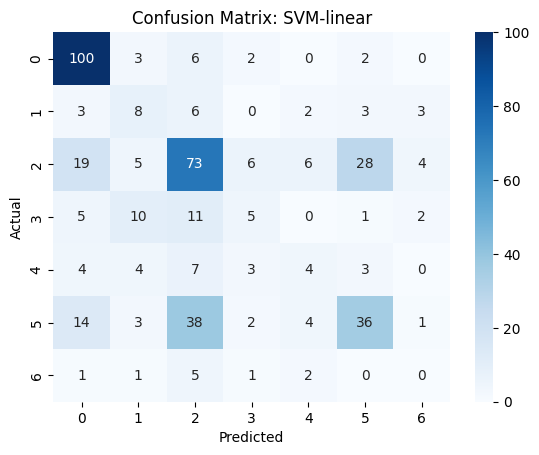

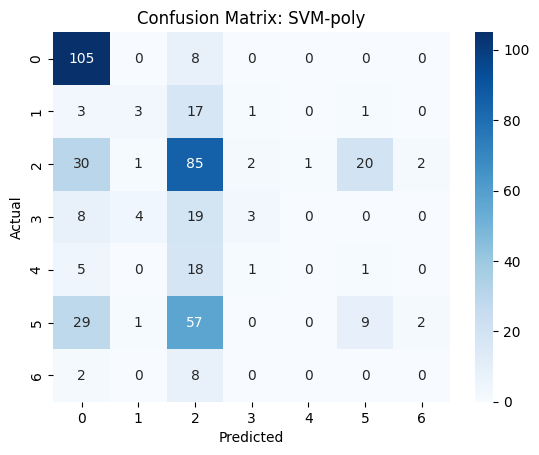

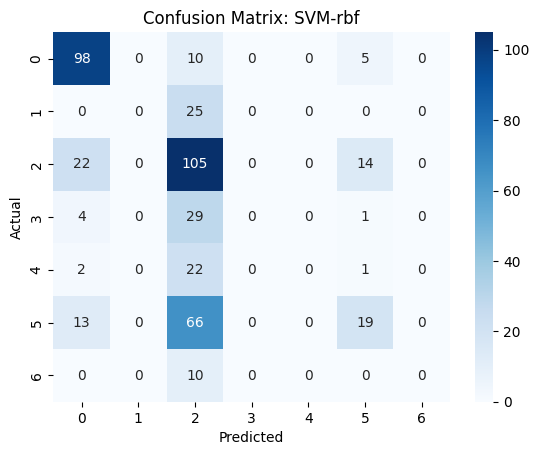

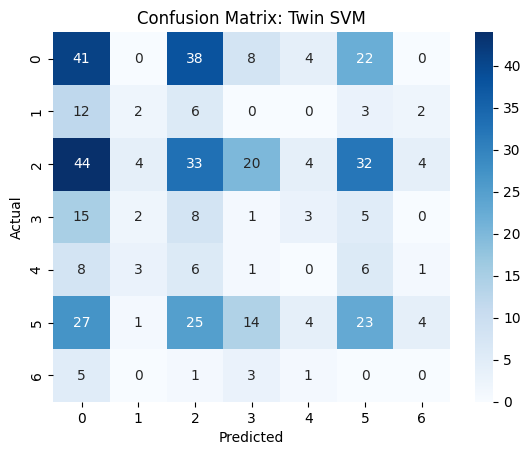

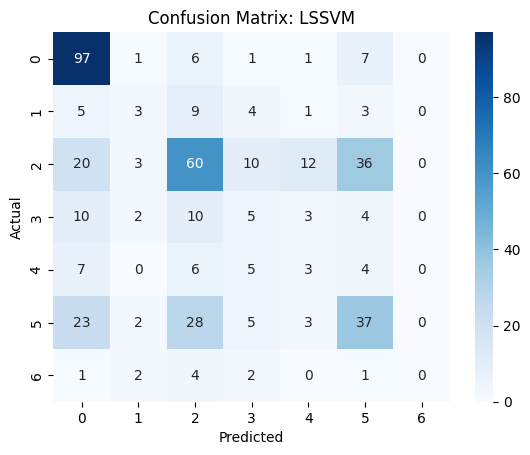

In [ ]:
#Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model, preds in {**svm_preds}.items():
    plot_confusion_matrix(y_test, preds, model)

In [ ]:
'''# ROC Curves
plt.figure(figsize=(12,6))
for model, preds in {**svm_preds}.items():
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, label=f"{model} (AUC: {auc(fpr, tpr):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()'''

'# ROC Curves\nplt.figure(figsize=(12,6))\nfor model, preds in {**svm_preds}.items():\n    fpr, tpr, _ = roc_curve(y_test, preds)\n    plt.plot(fpr, tpr, label=f"{model} (AUC: {auc(fpr, tpr):.2f})")\nplt.plot([0,1],[0,1],\'k--\')\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC Curves for Models\')\nplt.legend()\nplt.show()'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Convert X from a list of arrays to a single NumPy array
# X = np.array(X)

# ⚠️ Tes données doivent être prêtes : X (features), y (labels)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 🔹 Fonctions personnalisées : Twin SVM & LSSVM 🔹
# def twin_svm(X_train, y_train, X_test):
#     w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
#     y_pred = np.sign(X_test @ w)
#     return (y_pred + 1) // 2  # Convert {-1,1} to {0,1}

# def lssvm(X_train, y_train, X_test):
#     K = X_train @ X_train.T + np.eye(len(X_train))
#     alpha = np.linalg.solve(K, y_train)
#     y_pred = np.sign(X_test @ X_train.T @ alpha)
#    return (y_pred + 1) // 2

# 🔹 Initialiser les F1-scores 🔹
f1_scores = {
    'SVM-linear': [],
    'SVM-rbf': []
}

# 🔁 Cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_padded, y)):
    print(f"\n--- Fold {fold+1}/{n_splits} ---")
    X_train, X_test = X_padded[train_idx], X_padded[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # ⚠️ Si Twin SVM/LSSVM nécessitent des labels {-1, 1}, convertir ici :
    #y_train_pm1 = 2 * y_train - 1

    # SVM classiques
    for kernel in ['linear', 'rbf']:
        clf = SVC(kernel=kernel, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        #f1 = f1_score(y_test, y_pred, average='weighted')
        # Ensure y_test is a NumPy array for f1_score
        f1 = f1_score(y_test.to_numpy(), y_pred, average='weighted')
        f1_scores[f'SVM-{kernel}'].append(f1)
        print(f"SVM-{kernel}: F1-score = {f1:.4f}")

    # Twin SVM
    # y_pred = twin_svm(X_train, y_train_pm1, X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # f1_scores['Twin SVM'].append(f1)
    # print(f"Twin SVM: F1-score = {f1:.4f}")

    # # LSSVM
    # y_pred = lssvm(X_train, y_train_pm1, X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # f1_scores['LSSVM'].append(f1)
    # print(f"LSSVM: F1-score = {f1:.4f}")

# 🔚 Résultats finaux
print("\n✅ Moyennes des F1-scores sur les 5 folds :")
for model, scores in f1_scores.items():
    print(f"{model}: {np.mean(scores):.4f}")



--- Fold 1/5 ---
SVM-linear: F1-score = 0.4841
SVM-rbf: F1-score = 0.4423

--- Fold 2/5 ---
SVM-linear: F1-score = 0.4871
SVM-rbf: F1-score = 0.4367

--- Fold 3/5 ---
SVM-linear: F1-score = 0.4934
SVM-rbf: F1-score = 0.4320

--- Fold 4/5 ---
SVM-linear: F1-score = 0.4428
SVM-rbf: F1-score = 0.4136

--- Fold 5/5 ---
SVM-linear: F1-score = 0.4872
SVM-rbf: F1-score = 0.4609

✅ Moyennes des F1-scores sur les 5 folds :
SVM-linear: 0.4789
SVM-rbf: 0.4371


In [ ]:
for model, scores in f1_scores.items():
    print(f"{model}: {scores}")

SVM-linear: [0.4841393792968742, 0.4871488143313621, 0.49337894159703727, 0.44283061545777036, 0.4871926041759926]
SVM-rbf: [0.4422786310547786, 0.43674228840261475, 0.43201150397700877, 0.41355650602613675, 0.4609178154310649]
